In [2]:
#importing libries for loading, cleaning and data exploration

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#loading data

df = pd.read_csv(r"C:\Users\uzond\data science projects\diabetes prediction app project\diabetes.csv")


In [5]:
df.head(5)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df.tail()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [14]:
#ascertaining the max glaucose level from the data
max_glucose = df["Glucose"].max()
print("maximium glucose level:",max_glucose)


maximium glucose level: 199


In [15]:
#ascertaining the maximum bloodpressure level from the data
max_bp = df["BloodPressure"].max()
print("maximium bloodpressure level:",max_bp)


maximium bloodpressure level: 122


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### the  data is clean, there is no missing value. the datatype consist of 2 floats and 7 integers.i.e they are all numbers. no objects(string data)


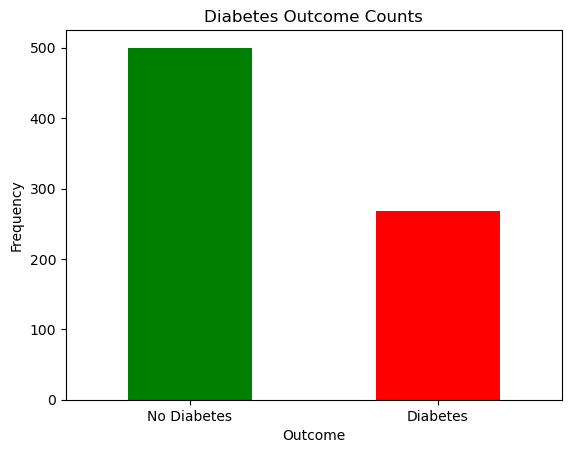

In [8]:
#bar chat to compare outcome

df['Outcome'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Diabetes Outcome Counts')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'], rotation=0)
plt.show()


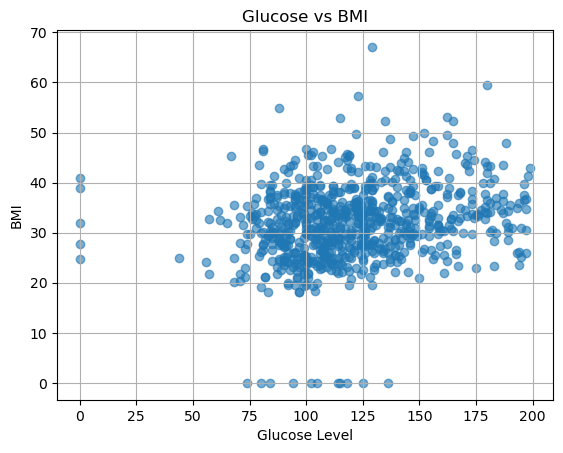

In [9]:
#scatter plot showing glucose vs BMI

plt.scatter(df['Glucose'], df['BMI'], alpha=0.6)
plt.title('Glucose vs BMI')
plt.xlabel('Glucose Level')
plt.ylabel('BMI')
plt.grid(True)
plt.show()


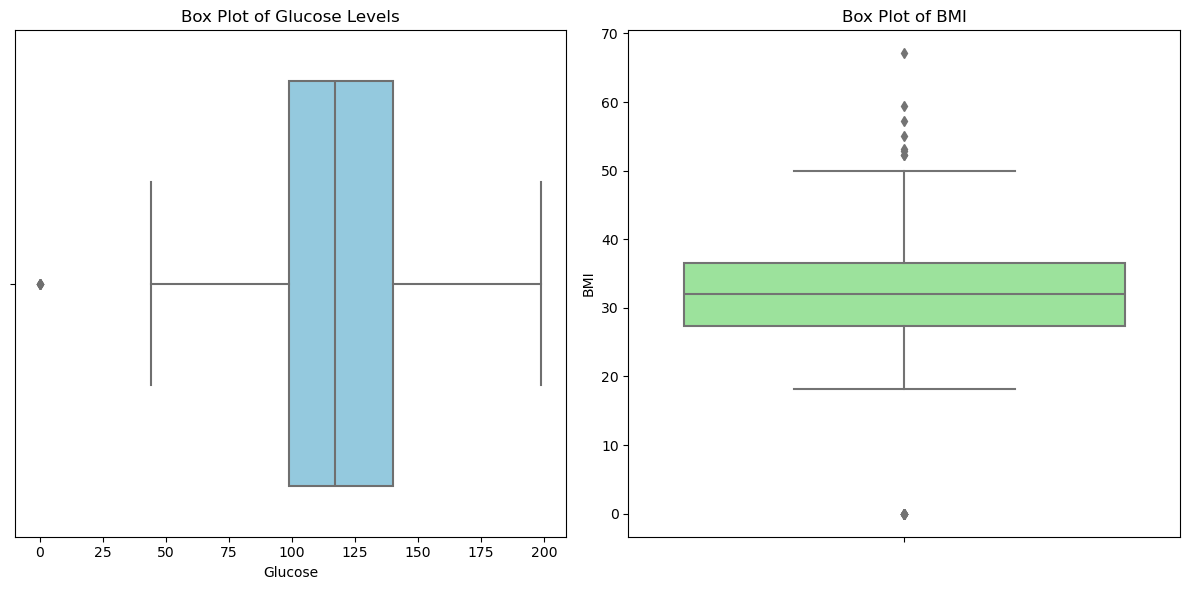

In [10]:
plt.figure(figsize=(12, 6))

# Box plot for Glucose
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Glucose'], color='skyblue')
plt.title('Box Plot of Glucose Levels')

# Box plot for BMI
plt.subplot(1, 2, 2)
sns.boxplot(y=df['BMI'], color='lightgreen')
plt.title('Box Plot of BMI')

# Display the plots
plt.tight_layout()
plt.show()











### Model training using logistic Regression

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
# Split data
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("precision:", precision_score(y_test,predictions))

Accuracy: 0.7467532467532467
precision: 0.6379310344827587


In [12]:
import pickle
pickle.dump(model, open("diabetes_model.pkl", "wb"))
